In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from random import randint
import matplotlib.cm as cm
from skimage import io, color
import os
from glob import glob

from pathlib import Path



In [2]:
image_folders = glob("./faces94/*/*/*.jpg", recursive = True)
#os.path.dirname(image_folders[0])

from pathlib import Path
Path(image_folders[0]).parent.name


'tony'

In [3]:
len(list(os.walk("./faces94"))[3][2])

20

In [4]:
import os
images = {
    "male":[],
    "female":[]
}

female_subj = 0
male_subj = 0

males_name = []
females_name = []

for root, dirs, files in os.walk("./faces94"):
    for file in files:
        if file.endswith(".jpg"):
            if "female" in root:
                female_subj += 1
                subj_name = Path(os.path.join(root, file)).parent.name
                females_name.append(subj_name)
                images["female"].append(os.path.join(root, file))
            elif "male" in root:
                male_subj += 1
                subj_name = Path(os.path.join(root, file)).parent.name
                males_name.append(subj_name)
                images["male"].append(os.path.join(root, file))

tot_num = 0
for gender in images.keys():
    tot_num += len(images[gender])
tot_num

3059

In [5]:
males_name

['tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'tony',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'anonym',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'obeidn',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'ieorf',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',
 'anonym2',


In [6]:

# %% Read image data
numImg = 20
numSbj = 20 #number of subjects
A = np.zeros([tot_num, 180 * 200])
y = np.zeros([tot_num])
j = numSbj
c = 0

A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
for gender, paths in images.items():
    for image_path in paths:
        A[c, :] = color.rgb2gray(io.imread(image_path)).reshape([1, 180 * 200])
        if gender == 'female':
            y[c] = 0 #female is 0
        if gender == 'male':
            y[c] = 1
        c = c + 1


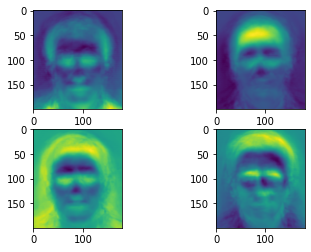

In [8]:
plt.figure()
pca = PCA(n_components=8)
pca.fit(A)
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    ax.imshow(pca.components_[i].reshape([200, 180]))
plt.show()

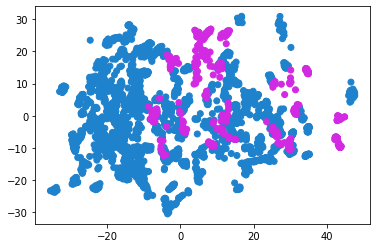

In [9]:
#Colors for distinct individuals
cols = ['#{:06x}'.format(randint(0, 0xffffff)) for i in range(numSbj)]
pltCol = [cols[int(k)] for k in y]
# %% Plot 2d PCA data
drA = pca.transform(A)
plt.figure()
plt.scatter(drA[:, 0], drA[:, 1], color=pltCol)
plt.show()

In [10]:

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(A):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = A[train_index], A[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [1020 1021 1022 ... 3056 3057 3058] TEST: [   0    1    2 ... 1017 1018 1019]
TRAIN: [   0    1    2 ... 3056 3057 3058] TEST: [1020 1021 1022 ... 2037 2038 2039]
TRAIN: [   0    1    2 ... 2037 2038 2039] TEST: [2040 2041 2042 ... 3056 3057 3058]


In [11]:
from sklearn.metrics import accuracy_score

# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
#Use cross validation to check performance
k_fold = KFold(3, shuffle=True)
for trn, tst in k_fold.split(A):
    #Use PCA to transform from dimension F to dimension N-m
    pca = PCA(n_components=(len(trn) - numSbj))
    pca.fit(A[trn])
    #Compute LDA of reduced data
    lda.fit(pca.transform(A[trn]), y[trn])
    yHat = lda.predict(pca.transform(A[tst]))
    #Compute classification error
    outVal = accuracy_score(y[tst], yHat)
    print('Score: ' + str(outVal))

Score: 0.9970588235294118
Score: 0.9950980392156863
Score: 0.9980372914622179


In [ ]:
# %% Fit all data for plots
pca = PCA(n_components=(len(A) - numSbj))
pca.fit(A)
pcatA = pca.transform(A)
lda.fit(pcatA, y)
ldatA = lda.transform(pcatA)
#Plot fisherfaces
plt.figure()

In [ ]:
# %% simplified LDA
k_fold = KFold(3, shuffle=True)
for (trn, tst) in k_fold.split(A):
    #Compute LDA of reduced data
    lda.fit(A[trn], y[trn])
    #Compute classification error
    outVal = lda.score(A[tst], y[tst])
    print('Score: ' + str(outVal))